In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
symptoms=pd.read_csv("D:\Detecting parkinsons disease\cleaned-data.csv")
symptoms.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00576,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00576,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00576,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01101,0.000037,0.00593,0.00576,0.01778,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
symptoms.columns

Index(['Unnamed: 0', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [14]:
#independent variables
x=symptoms.drop(['status','name'],axis=1)

#dependent variable
y=symptoms['status']

In [15]:
#splitting the data set into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [19]:
#prediction
y_pred=model.predict(x_test)
pd.DataFrame({'actual status':y_test,"predicted status:":y_pred})

,actual status,predicted status:
138,1,1
16,1,0
155,1,1
96,1,1
68,1,1
153,1,1
55,1,1
15,1,0
112,1,1
111,1,0


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 8,  3],
       [ 9, 29]], dtype=int64)

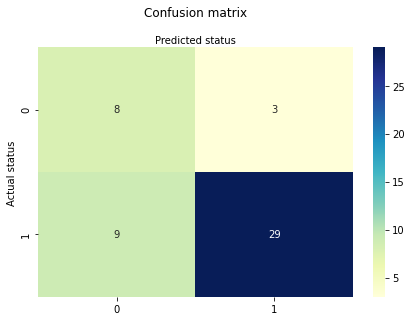

In [22]:
#Heatmap for confusionmatrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual status')
plt.xlabel('Predicted status')
plt.savefig("HeatMap")

In [26]:
from sklearn import metrics
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy_score is :",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy_score is : 75.51020408163265
Precision: 90.625
Recall: 76.31578947368422
